<a href="https://colab.research.google.com/github/treefield00/AIJobColle/blob/main/%E7%AC%AC7%E5%9B%9E_LSTM_wave_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


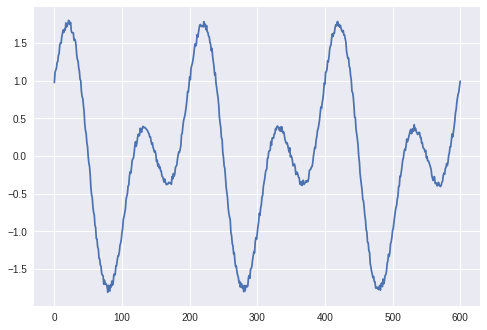

In [ ]:
def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)
  
def cos(x, T=100):
    return np.cos(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=300):
    x = np.arange(0, 2 * T + 1)
    noise =  np.random.uniform(low=-0.05, high=0.05, size=len(x))
    return sin(x) + cos(x/2) + noise

f = toy_problem()
plt.plot(f)

In [ ]:
def make_dataset(low_data):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen])
        target.append(low_data[i + maxlen])

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target

x_train, y_train = make_dataset(f)

In [ ]:
# データの中身がわからない場合は、printしてみてみましょう
# 特に, データのフォーマットの概観を把握するにはshapeが便利.
print(x_train.shape) # 1次元のデータが25個連なったデータ
print(x_train)

(576, 25, 1)
[[[ 0.97556882]
  [ 1.10942242]
  [ 1.14133376]
  ...
  [ 1.78812829]
  [ 1.74729917]
  [ 1.77257439]]

 [[ 1.10942242]
  [ 1.14133376]
  [ 1.16127642]
  ...
  [ 1.74729917]
  [ 1.77257439]
  [ 1.66361394]]

 [[ 1.14133376]
  [ 1.16127642]
  [ 1.24048364]
  ...
  [ 1.77257439]
  [ 1.66361394]
  [ 1.63666141]]

 ...

 [[-0.35047876]
  [-0.33299714]
  [-0.25421506]
  ...
  [ 0.70803195]
  [ 0.77473345]
  [ 0.82181809]]

 [[-0.33299714]
  [-0.25421506]
  [-0.22648081]
  ...
  [ 0.77473345]
  [ 0.82181809]
  [ 0.85082099]]

 [[-0.25421506]
  [-0.22648081]
  [-0.24204993]
  ...
  [ 0.82181809]
  [ 0.85082099]
  [ 0.92471176]]]


In [ ]:
length_of_sequence = x_train.shape[1] 
in_out_neurons = 1 # 1次元の入力が入り、1次元の出力を出す
n_hidden = 800

model = Sequential()
model.add(GRU(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=5)
model.fit(x_train, y_train,
          batch_size=300,
          epochs=100,
          validation_split=0.1,
          callbacks=[early_stopping],
          verbose=1
          )

Train on 518 samples, validate on 58 samples
Epoch 1/100
518/518 [==============================] - 2s 4ms/step - loss: 0.9257 - val_loss: 0.0538
Epoch 2/100
518/518 [==============================] - 0s 508us/step - loss: 0.1303 - val_loss: 0.0330
Epoch 3/100
518/518 [==============================] - 0s 464us/step - loss: 0.1081 - val_loss: 0.0133
Epoch 4/100
518/518 [==============================] - 0s 419us/step - loss: 0.0277 - val_loss: 0.0165
Epoch 5/100
518/518 [==============================] - 0s 407us/step - loss: 0.0606 - val_loss: 0.0163
Epoch 6/100
518/518 [==============================] - 0s 411us/step - loss: 0.0559 - val_loss: 0.0118
Epoch 7/100
518/518 [==============================] - 0s 406us/step - loss: 0.0262 - val_loss: 0.0079
Epoch 8/100
518/518 [==============================] - 0s 406us/step - loss: 0.0142 - val_loss: 0.0082
Epoch 9/100
518/518 [==============================] - 0s 402us/step - loss: 0.0262 - val_loss: 0.0085
Epoch 10/100
518/518 [========

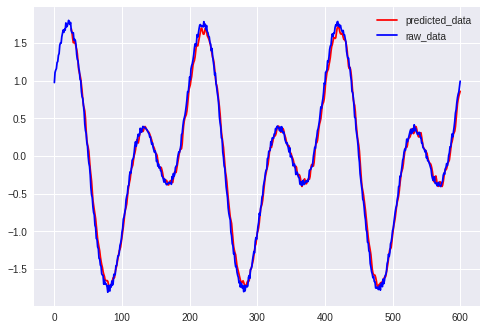

In [ ]:
predicted = model.predict(x_train)
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predicted_data")
plt.plot(range(0, len(f)), f, color="b", label="raw_data")
plt.legend()
plt.show()